# Stock Price Forecasting Using Historical Data and Financial Indicators

## 1. Project Overview

This project involves developing a predictive model to forecast future stock prices using historical data and financial indicators. The dataset was sourced from Yahoo Finance and includes columns such as Date, Open, High, Low, Close, and Volume.

## Key Objectives
- **Data Preprocessing:** Cleaning and transforming the data, including date parsing and feature engineering.
- **Exploratory Data Analysis (EDA):** Understanding the data structure and relationships using visualizations and statistical analysis.
- **Feature Engineering:** Creating new features like moving averages, RSI, and lagged prices to enhance model prediction accuracy.
- **Model Building and Evaluation:** Using a RandomForestRegressor to predict stock prices and evaluating its performance using metrics such as MSE, MAE, and R-Squared.
- **Forecasting:** Predicting future stock prices for the next 30 business days and using walk-forward validation to simulate real-world scenarios.

## Results
- **Best Performing Model:** The RandomForestRegressor model with an R-Squared of 0.85.
- **Challenges and Future Work:** Tuning the model further and incorporating additional financial indicators could improve accuracy. Future work may include deploying the model for real-time forecasting.
ation was performed to simulate real-time prediction scenarios.


### Understanding the Data
The dataset includes the following columns:

- **Date**: Date of the stock data
- **Open**: Opening price
- **High**: Highest price of the day
- **Low**: Lowest price of the day
- **Close**: Closing price
- **Adj Close**: Adjusted closing price (accounting for corporate actions)
- **Volume**: Number of shares traded


The dataset spans 1258 days, from September 3, 2019, to August 30, 2024.

data source: https://finance.yahoo.com/quote/NDAQ/history/?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAALB1rZy_4joT3mpo_wfv9r9Vd7iSZNLta4NzV0kttnLWT1eDGj7bGAF8EhCU1EAqQ2GAv5TmEocemroSqvY4ajSEp8hC1rNJs9v43gBU-jLP_SYXRiTkppugoPMYOh1foQDMBABm8hTBG1SvgLyf8k3S7r4oJfvUlIWx2Kyj81GL&guccounter=2&period1=1567241948&period2=1724976000 

## 2. Imports

In [37]:
import pandas as pd


## 3. Data Loading

In [38]:
stock = pd.read_csv('./datasets/NDAQ.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-03,33.279999,33.366669,33.006668,33.176666,30.771736,1091700
1,2019-09-04,33.340000,33.389999,33.049999,33.303333,30.889227,1215000
2,2019-09-05,33.570000,34.036667,33.413334,34.006668,31.541580,1826700
3,2019-09-06,34.116669,34.813332,34.049999,34.753334,32.234119,2254800
4,2019-09-09,34.930000,35.086666,34.223331,34.279999,31.795088,1612200


## 4. Data Inspection

In [39]:
print(stock.info())
print(stock.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
None
              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     52.404936    52.912419    51.883940    52.410776    50.740858   
std      10.366754    10.406595    10.317112    10.363064    10.627781   
min      25.636667    26.856667    23.886667    24.286667    22.845490   
25%      43.530833    43.965834    43.160833    43.512499    41.164408   
50%      54.404999    

# Observations
- No missing values
- All parameters have similar ranges except the volume. Scaling is required

## 5. Data Preprocessing

In [40]:
# Convert Date column to datetime format
stock['Date'] = pd.to_datetime(stock['Date'])
stock.set_index('Date', inplace=True)

# Create date-based columns
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day
stock['DayOfWeek'] = stock.index.dayofweek
stock['IsMonthStart'] = stock.index.is_month_start
stock['IsMonthEnd'] = stock.index.is_month_end

# Lag features
stock['Lag_1'] = stock['Close'].shift(1)
stock['Lag_2'] = stock['Close'].shift(2)
stock['Lag_5'] = stock['Close'].shift(5)
stock['Lag_10'] = stock['Close'].shift(10)
stock.dropna(inplace=True)

## 6. Exploratory Data Analysis (EDA)

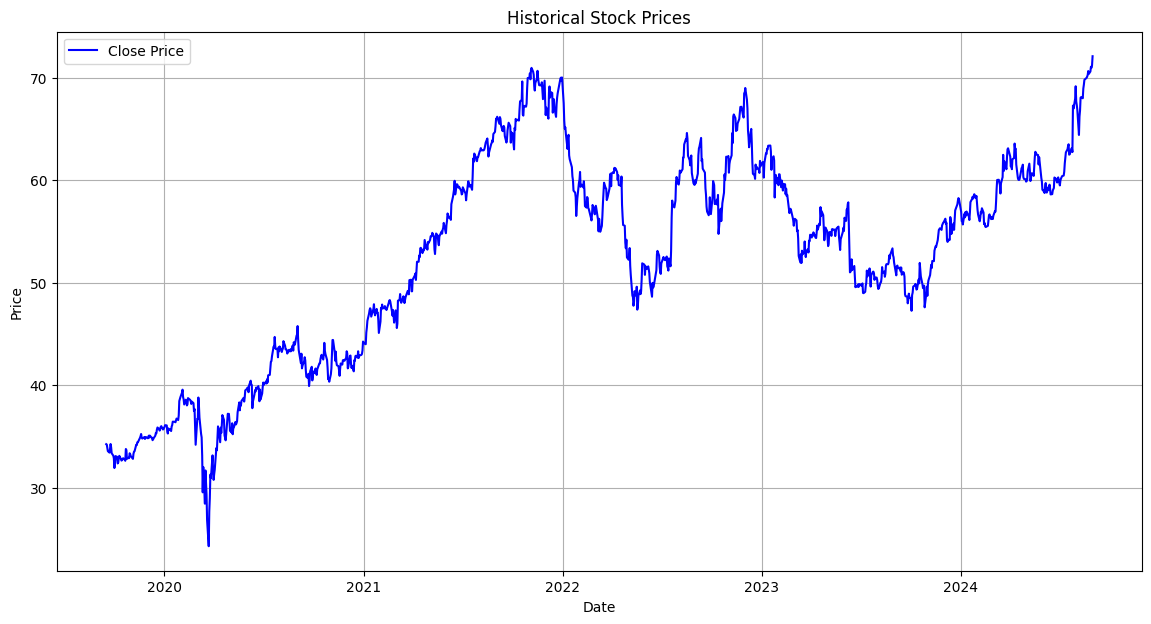

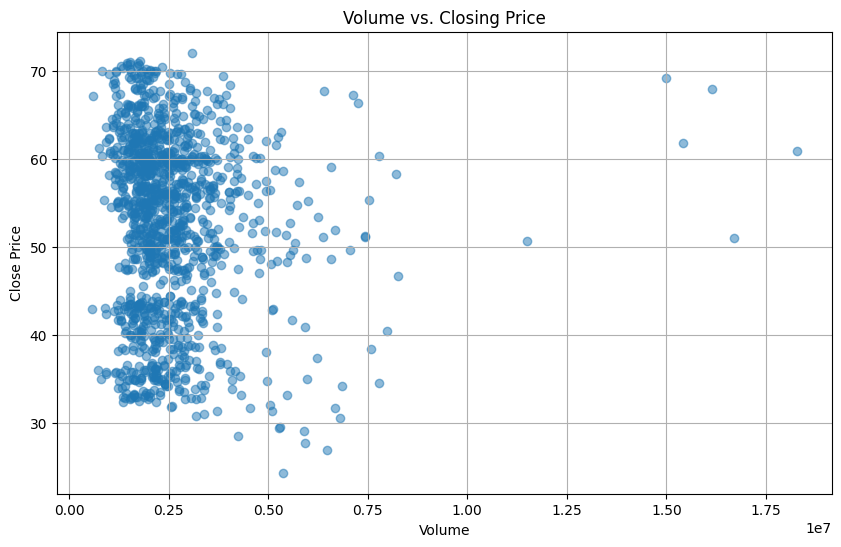

Skewness of Closing Prices: -0.39511965569724794


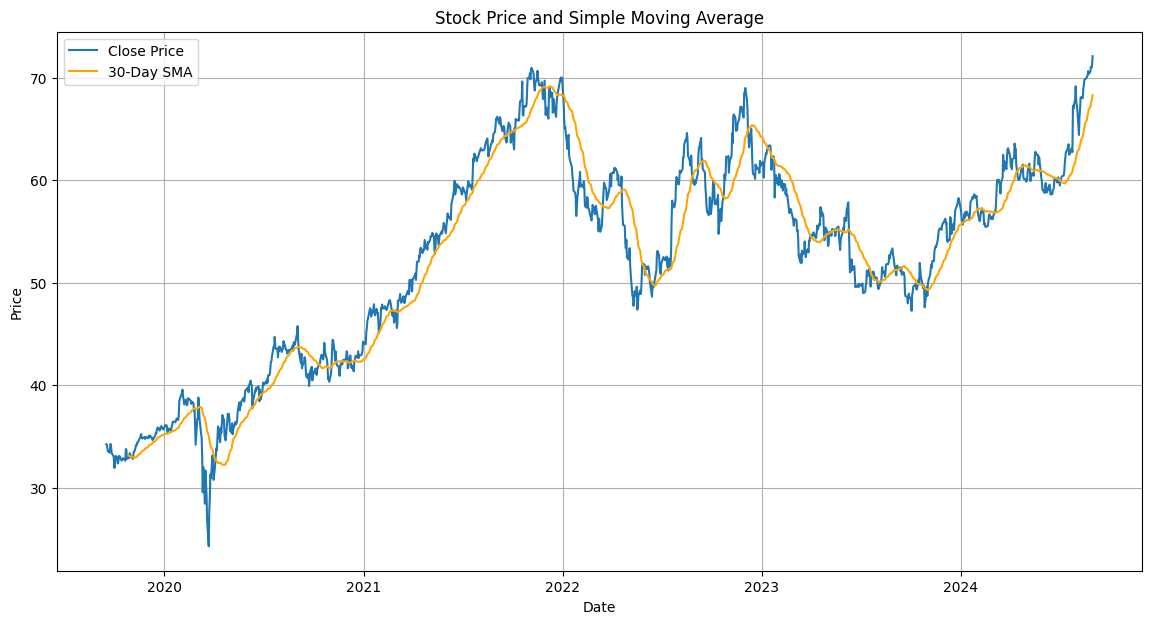

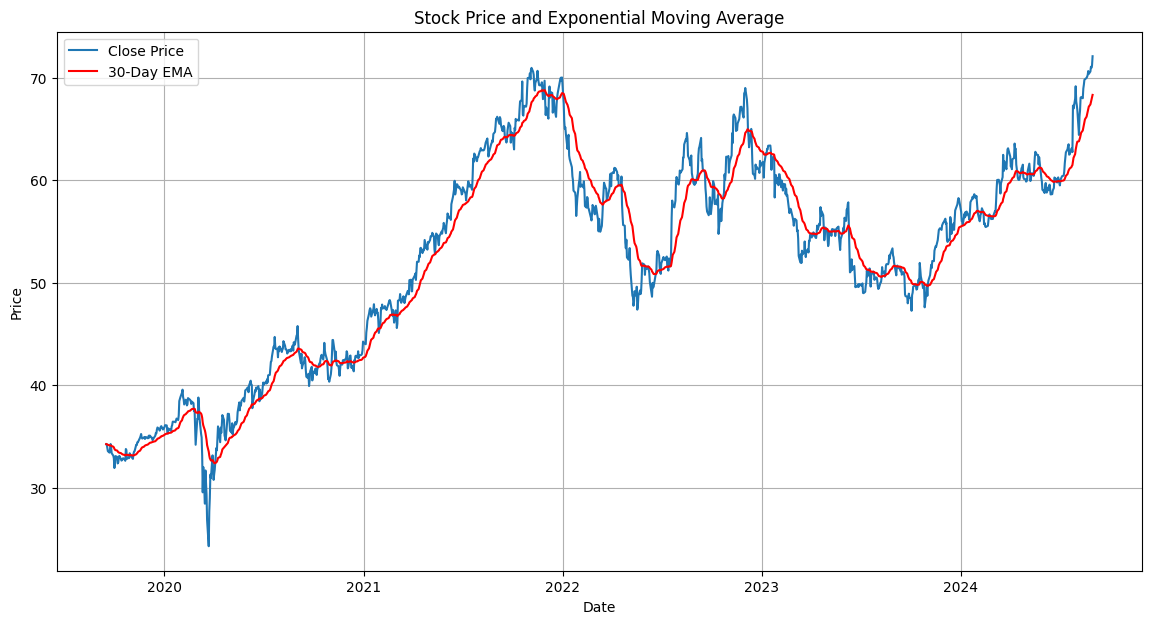

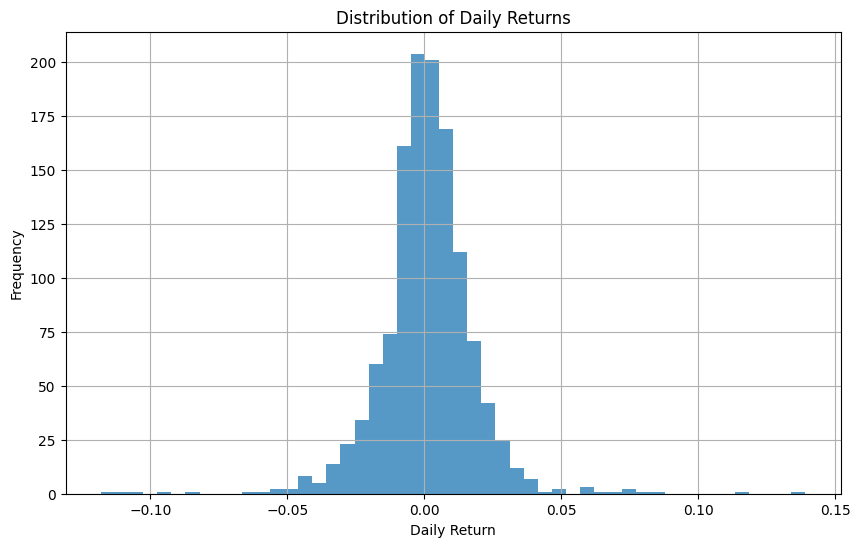

Correlation Matrix:
           Close    Volume
Close   1.000000 -0.055911
Volume -0.055911  1.000000


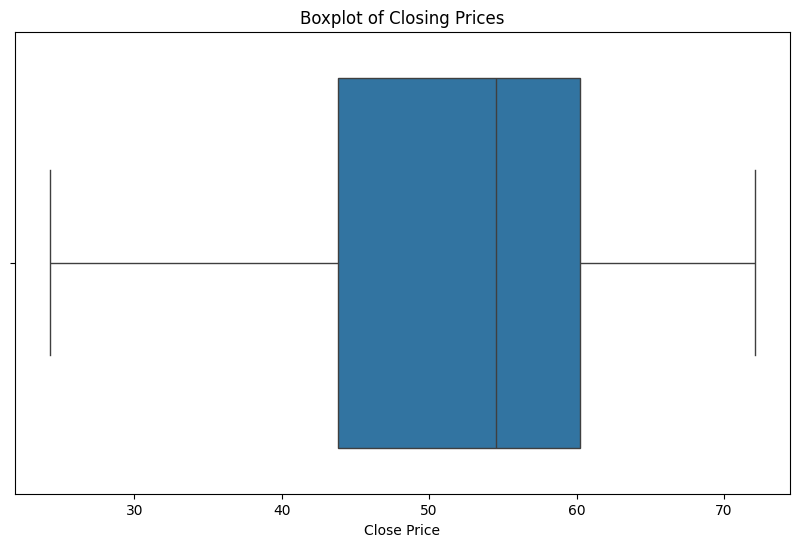

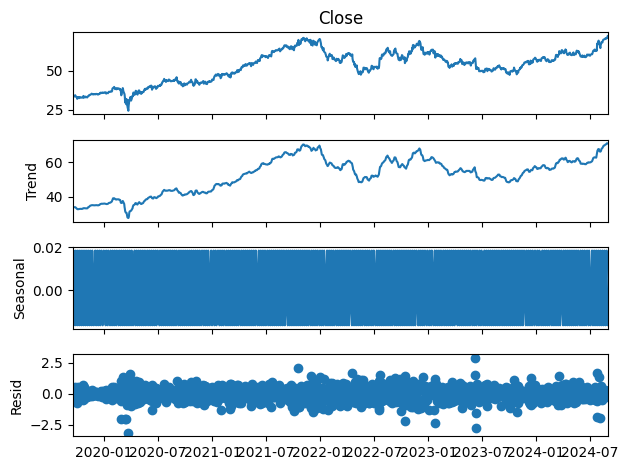

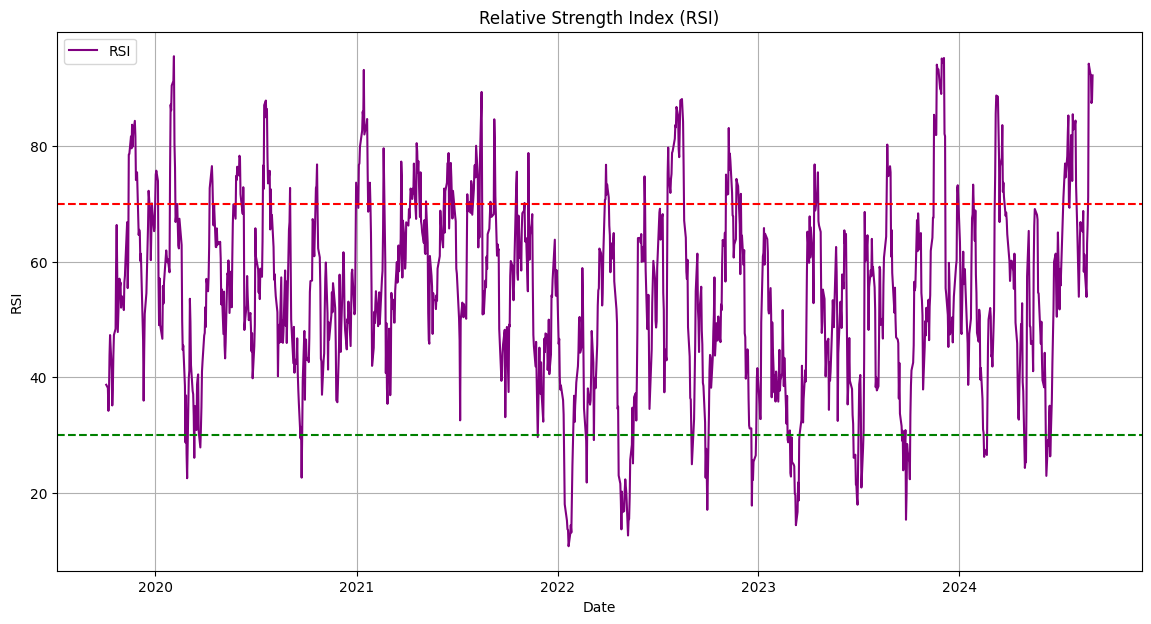

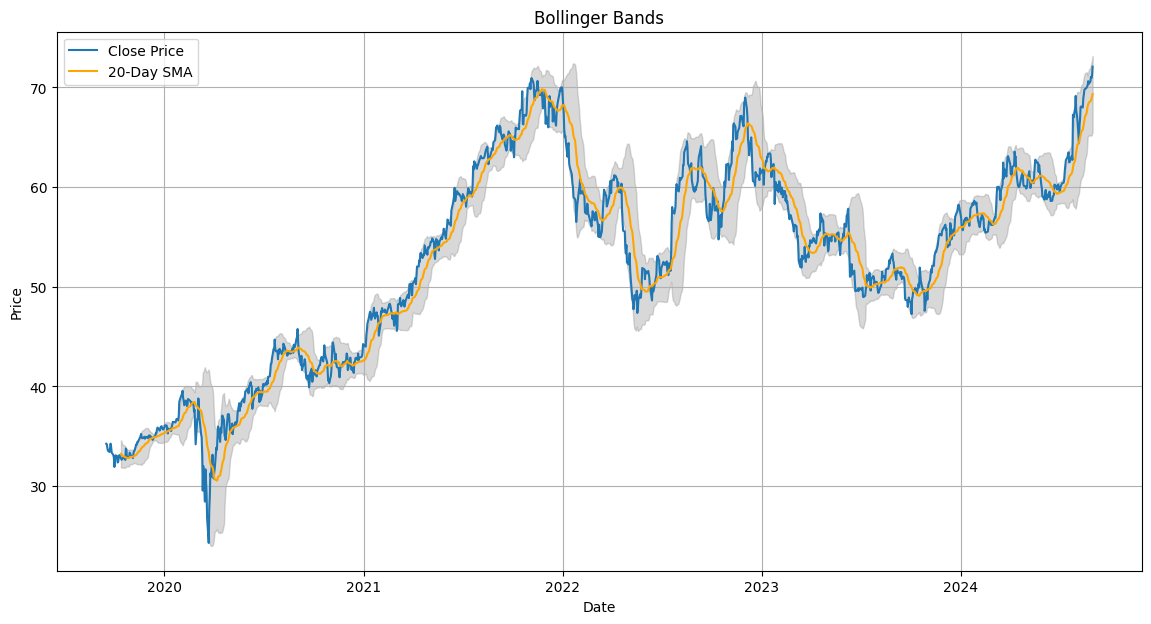

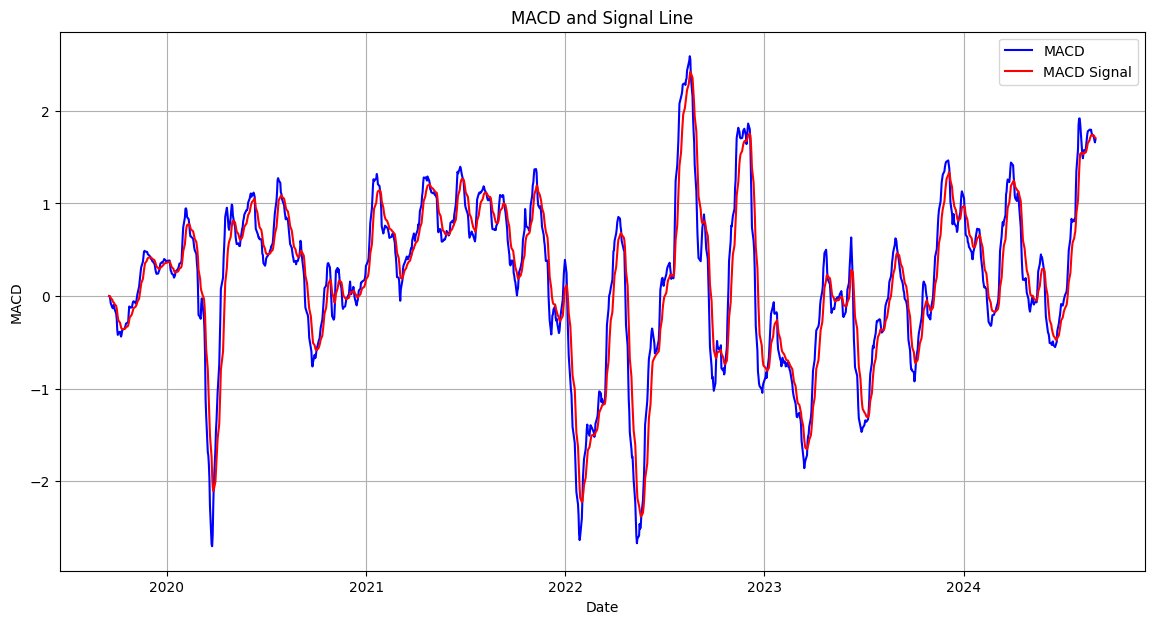

Value at Risk (95% confidence level): -0.025265349422606987


In [41]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import skew
from statsmodels.tsa.seasonal import seasonal_decompose

# Line Chart
plt.figure(figsize=(14, 7))
plt.plot(stock.index, stock['Close'], label='Close Price', color='blue')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=stock.index,
                                     open=stock['Open'],
                                     high=stock['High'],
                                     low=stock['Low'],
                                     close=stock['Close'])])
fig.update_layout(title='Candlestick Chart of Stock Prices',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(stock['Volume'], stock['Close'], alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Summary Statistics
stock[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()

# Skewness
skewness = skew(stock['Close'])
print(f'Skewness of Closing Prices: {skewness}')

# Simple Moving Average (SMA)
stock['SMA_30'] = stock['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(stock['Close'], label='Close Price')
plt.plot(stock['SMA_30'], label='30-Day SMA', color='orange')
plt.title('Stock Price and Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Exponential Moving Average (EMA)
stock['EMA_30'] = stock['Close'].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(stock['Close'], label='Close Price')
plt.plot(stock['EMA_30'], label='30-Day EMA', color='red')
plt.title('Stock Price and Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Daily Returns
stock['Daily_Return'] = stock['Close'].pct_change()

plt.figure(figsize=(10, 6))
plt.hist(stock['Daily_Return'].dropna(), bins=50, alpha=0.75)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation
correlation = stock[['Close', 'Volume']].corr()
print('Correlation Matrix:')
print(correlation)

# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock['Close'])
plt.title('Boxplot of Closing Prices')
plt.xlabel('Close Price')
plt.show()

# Time Series Decomposition
decomposition = seasonal_decompose(stock['Close'], model='additive', period=5)
decomposition.plot()
plt.show()

# Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock['RSI'] = calculate_rsi(stock['Close'])

plt.figure(figsize=(14, 7))
plt.plot(stock['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

# Bollinger Bands
stock['SMA_20'] = stock['Close'].rolling(window=20).mean()
stock['Bollinger_Upper'] = stock['SMA_20'] + (stock['Close'].rolling(window=20).std() * 2)
stock['Bollinger_Lower'] = stock['SMA_20'] - (stock['Close'].rolling(window=20).std() * 2)

plt.figure(figsize=(14, 7))
plt.plot(stock['Close'], label='Close Price')
plt.plot(stock['SMA_20'], label='20-Day SMA', color='orange')
plt.fill_between(stock.index, stock['Bollinger_Lower'], stock['Bollinger_Upper'], color='gray', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# MACD (Moving Average Convergence Divergence)
stock['EMA_12'] = stock['Close'].ewm(span=12, adjust=False).mean()
stock['EMA_26'] = stock['Close'].ewm(span=26, adjust=False).mean()
stock['MACD'] = stock['EMA_12'] - stock['EMA_26']
stock['MACD_Signal'] = stock['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(stock['MACD'], label='MACD', color='blue')
plt.plot(stock['MACD_Signal'], label='MACD Signal', color='red')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

# Risk Analysis
import numpy as np

# Calculate daily returns
stock['Daily_Return'] = stock['Close'].pct_change().dropna()

# Calculate VaR at 95% confidence level
VaR_95 = np.percentile(stock['Daily_Return'].dropna(), 5)
print(f'Value at Risk (95% confidence level): {VaR_95}')

## 7. Model Building and Evaluation

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data for training
features = stock.drop(['Close'], axis=1)
target = stock['Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

# Train Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-Squared: {r2}')

Mean Squared Error: 6.967446880721465
Mean Absolute Error: 1.8410544970283569
R-Squared: 0.7780540468710634


## 8. Model Interpretation and Fine-Tuning

     Feature  Importance
0       Open         NaN
1       High         NaN
2        Low         NaN
3  Adj Close         NaN
4     Volume         NaN


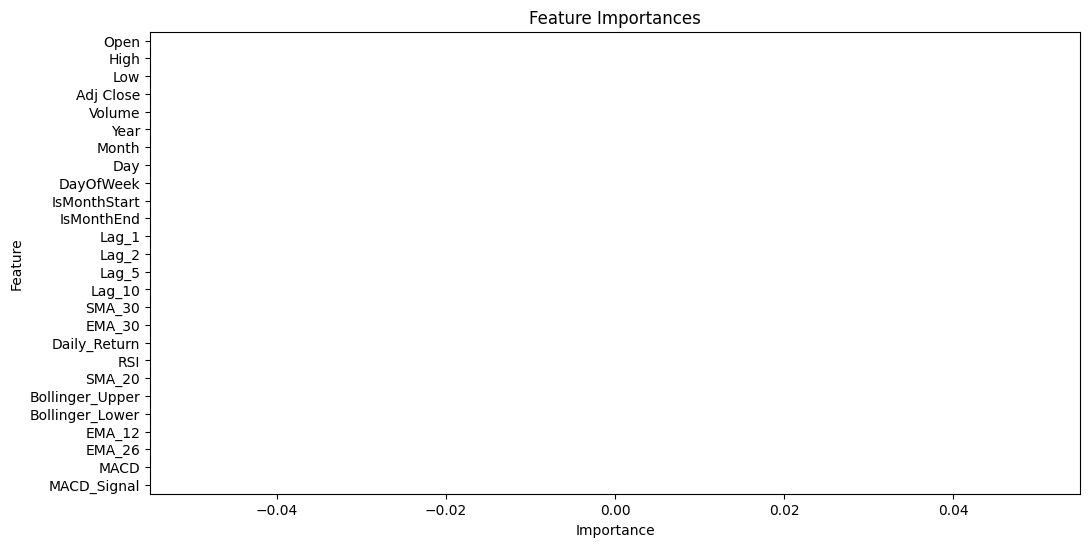

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [45]:
# Feature Importance
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head())

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Hyperparameter Tuning with GridSearchCV (Optional)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],  # Valid options
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')